In [1]:
#find all shares that are included in DJI
#download time series
#build a correlation matrix
#find the biggest clique
#visualize data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas_datareader.data as web
import datetime

In [3]:
path='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
DJI=pd.read_html(path)[0][['Symbol', 'Company Name']]
ticker_dji=DJI['Symbol'].values
ticker_dji

array(['INTC', 'GS', 'CSCO', 'MMM', 'UTX', 'DIS', 'V', 'MRK', 'HD', 'AXP',
       'UNH', 'NKE', 'XOM', 'JNJ', 'TRV', 'IBM', 'MSFT', 'JPM', 'AAPL',
       'KO', 'VZ', 'MCD', 'PG', 'CVX', 'PFE', 'BA', 'WMT', 'DWDP', 'CAT',
       'WBA'], dtype=object)

In [4]:
start_time=datetime.datetime(2018,1,1)
finish_time=datetime.datetime(2018,12,31)
web_archiv={ }
for i in ticker_dji:
    web_archiv[i]=web.DataReader(i, 'yahoo', start_time, finish_time)['Close']

In [5]:
pd.DataFrame(web_archiv).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 30 columns):
INTC    251 non-null float64
GS      251 non-null float64
CSCO    251 non-null float64
MMM     251 non-null float64
UTX     251 non-null float64
DIS     251 non-null float64
V       251 non-null float64
MRK     251 non-null float64
HD      251 non-null float64
AXP     251 non-null float64
UNH     251 non-null float64
NKE     251 non-null float64
XOM     251 non-null float64
JNJ     251 non-null float64
TRV     251 non-null float64
IBM     251 non-null float64
MSFT    251 non-null float64
JPM     251 non-null float64
AAPL    251 non-null float64
KO      251 non-null float64
VZ      251 non-null float64
MCD     251 non-null float64
PG      251 non-null float64
CVX     251 non-null float64
PFE     251 non-null float64
BA      251 non-null float64
WMT     251 non-null float64
DWDP    251 non-null float64
CAT     251 non-null float64
WBA     251 non-null float64
dtypes

In [20]:
df=pd.DataFrame(web_archiv)
df_corr=df.corr()
df_corr

INTC        GS      CSCO       MMM       UTX       DIS         V  \
INTC  1.000000  0.160548  0.018679 -0.214727 -0.198086 -0.543874 -0.056992   
GS    0.160548  1.000000 -0.295230  0.749097  0.537212 -0.347669 -0.461526   
CSCO  0.018679 -0.295230  1.000000 -0.300077  0.204713  0.410043  0.733592   
MMM  -0.214727  0.749097 -0.300077  1.000000  0.500863 -0.105371 -0.526044   
UTX  -0.198086  0.537212  0.204713  0.500863  1.000000  0.421524  0.320791   
DIS  -0.543874 -0.347669  0.410043 -0.105371  0.421524  1.000000  0.667600   
V    -0.056992 -0.461526  0.733592 -0.526044  0.320791  0.667600  1.000000   
MRK  -0.371239 -0.795468  0.604033 -0.533906 -0.059160  0.754499  0.753937   
HD   -0.013374  0.318903  0.144994  0.196773  0.745029  0.288976  0.474966   
AXP  -0.215083 -0.373863  0.732914 -0.256874  0.403962  0.738381  0.814988   
UNH  -0.164901 -0.600007  0.679462 -0.517121  0.199336  0.767039  0.916110   
NKE  -0.074770 -0.378555  0.628269 -0.486824  0.364122  0.582918  0.942687   
XOM  -0.062471  0.296810  0.059030  0.273784  0.698579  0.402557  0.311381   
JNJ  -0.661481 -0.123026  0.334010  0.295656  0.380931  0.724795  0.261017   
TRV   0.043307  0.836837 -0.203243  0.867460  0.453363 -0.285688 -0.510822   
IBM   0.099887  0.887689 -0.311918  0.784041  0.593535 -0.317773 -0.394392   
MSFT -0.108262 -0.525914  0.753173 -0.539956  0.263318  0.693276  0.974544   
JPM   0.069682  0.724374  0.209697  0.560608  0.807646  0.115539  0.114282   
AAPL -0.131618 -0.057482  0.625495 -0.288005  0.564073  0.582512  0.816903   
KO   -0.549290 -0.515659  0.278817 -0.058147  0.087228  0.780681  0.402282   
VZ   -0.577034 -0.616639  0.429060 -0.255777  0.063931  0.820099  0.557055   
MCD  -0.365901 -0.543151  0.202528 -0.103869 -0.216438  0.523316  0.154833   
PG   -0.688004 -0.460245  0.134253  0.072385  0.013628  0.701750  0.201169   
CVX   0.351543  0.318445 -0.131174  0.173060  0.384763  0.016485  0.062126   
PFE  -0.483743 -0.643945  0.676363 -0.388560  0.115159  0.807402  0.748924   
BA    0.137089  0.177572  0.496695 -0.045531  0.577675  0.316690  0.559144   
WMT  -0.747064  0.058329  0.075978  0.406601  0.378508  0.620488  0.085716   
DWDP  0.108576  0.831689 -0.300422  0.742761  0.637627 -0.215737 -0.271420   
CAT   0.181479  0.775594 -0.257017  0.771069  0.490231 -0.348015 -0.417558   
WBA  -0.583499 -0.323010  0.331832  0.117751  0.149810  0.722239  0.234290   

           MRK        HD       AXP    ...           VZ       MCD        PG  \
INTC -0.371239 -0.013374 -0.215083    ...    -0.577034 -0.365901 -0.688004   
GS   -0.795468  0.318903 -0.373863    ...    -0.616639 -0.543151 -0.460245   
CSCO  0.604033  0.144994  0.732914    ...     0.429060  0.202528  0.134253   
MMM  -0.533906  0.196773 -0.256874    ...    -0.255777 -0.103869  0.072385   
UTX  -0.059160  0.745029  0.403962    ...     0.063931 -0.216438  0.013628   
DIS   0.754499  0.288976  0.738381    ...     0.820099  0.523316  0.701750   
V     0.753937  0.474966  0.814988    ...     0.557055  0.154833  0.201169   
MRK   1.000000 -0.011279  0.751926    ...     0.894584  0.648498  0.666245   
HD   -0.011279  1.000000  0.365324    ...    -0.033636 -0.293862 -0.167008   
AXP   0.751926  0.365324  1.000000    ...     0.710649  0.437748  0.434180   
UNH   0.885691  0.313376  0.855277    ...     0.750568  0.432954  0.425402   
NKE   0.650347  0.554729  0.699962    ...     0.455496 -0.013113  0.117180   
XOM   0.047080  0.760043  0.448586    ...     0.122735  0.067543  0.044493   
JNJ   0.553829  0.060362  0.593047    ...     0.767894  0.678402  0.818448   
TRV  -0.607962  0.128975 -0.299354    ...    -0.372188 -0.233765 -0.184328   
IBM  -0.741338  0.488426 -0.331607    ...    -0.605227 -0.555974 -0.424489   
MSFT  0.811147  0.345553  0.804152    ...     0.615668  0.194997  0.267523   
JPM  -0.288783  0.541983  0.211279    ...    -0.190786 -0.372887 -0.239530   
AAPL  0.455884  0.569739  0.656217    ...     0.324989 -0.095199  0.015168   
KO    0.791555 -0.073480  0.573

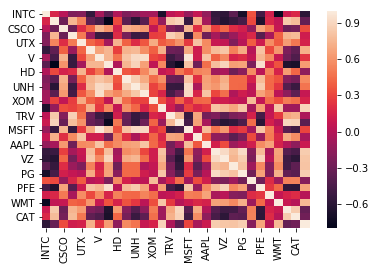

In [21]:
sns.heatmap(df_corr)

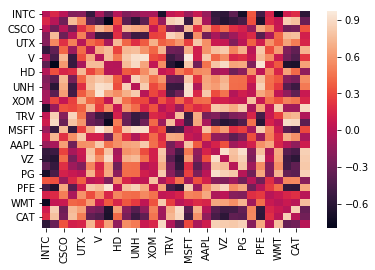

In [22]:
df1=df_corr.replace(1,0)
sns.heatmap(df1)

C:\Users\Yana\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


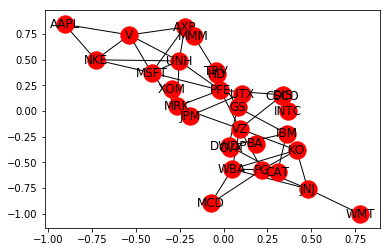

In [23]:
df2=(abs(df1)>0.8).astype(int)
m=df2.values
n=ticker_dji
G=nx.from_numpy_matrix(m)
nodes=dict(zip(G.nodes(),n))
G1=nx.relabel_nodes(G, nodes)
nx.draw_networkx(G1, pos= nx.kamada_kawai_layout(G1))

In [24]:
cliques=list(nx.find_cliques(G1))
sorted_cliques=sorted(cliques, key=len, reverse=True)

In [25]:
all_max_cliques=sorted_cliques[:5]
a=list()
for i in all_max_cliques:
    a.append(DJI[DJI['Symbol'].isin(i)]['Company Name'].values)
a

[array(['Johnson & Johnson', 'The Coca-Cola Company',
        'The Procter & Gamble Company', 'Walgreens Boots Alliance, Inc.'],
       dtype=object),
 array(['The Coca-Cola Company', 'Verizon Communications Inc.',
        'The Procter & Gamble Company', 'Walgreens Boots Alliance, Inc.'],
       dtype=object),
 array(['Visa Inc.', 'American Express Company',
        'UnitedHealth Group Incorporated', 'Microsoft Corporation'],
       dtype=object),
 array(['Merck & Co., Inc.', 'UnitedHealth Group Incorporated',
        'Microsoft Corporation', 'Pfizer Inc.'], dtype=object),
 array(['Visa Inc.', 'UnitedHealth Group Incorporated', 'NIKE, Inc.',
        'Microsoft Corporation'], dtype=object)]

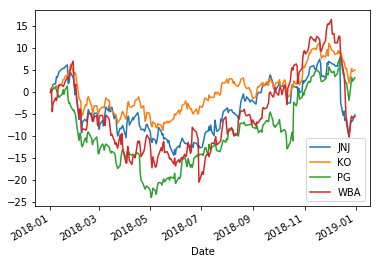

In [26]:
df_pct_0=(df/df.shift(1)-1).fillna(0)
df_pct_sum_0=(df_pct_0*100).cumsum()

#графики для первой из максимальных клик
df_pct_sum_0[['JNJ', 'KO', 'PG', 'WBA']].plot()

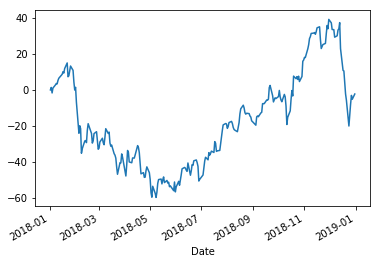

In [45]:
df_pct_sum_0[['JNJ', 'KO', 'PG', 'WBA']].sum(axis=1).plot()

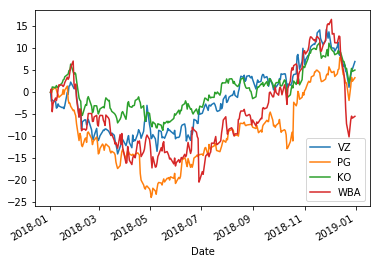

In [27]:
#графики для второй из максимальных клик
df_pct_sum_0[['VZ', 'PG', 'KO', 'WBA']].plot()

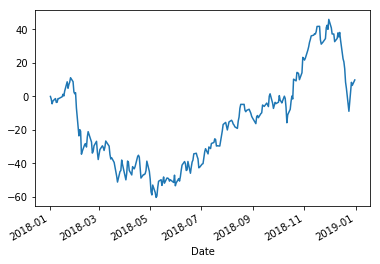

In [46]:
df_pct_sum_0[['VZ', 'PG', 'KO', 'WBA']].sum(axis=1).plot()

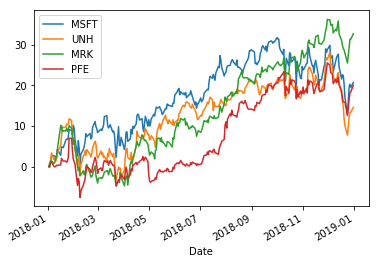

In [28]:
#графики для третьей из максимальных клик
df_pct_sum_0[['MSFT', 'UNH', 'MRK', 'PFE']].plot()

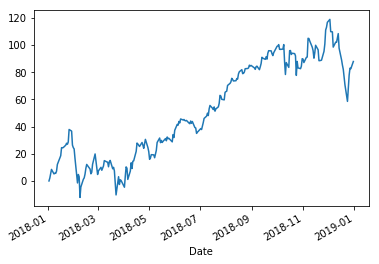

In [47]:
df_pct_sum_0[['MSFT', 'UNH', 'MRK', 'PFE']].sum(axis=1).plot()

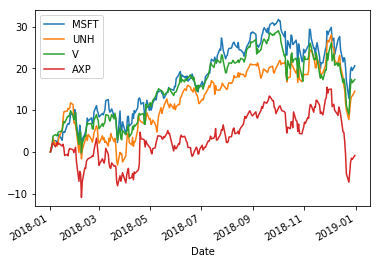

In [29]:
#графики для четвертой из максимальных клик
df_pct_sum_0[['MSFT', 'UNH', 'V', 'AXP']].plot()

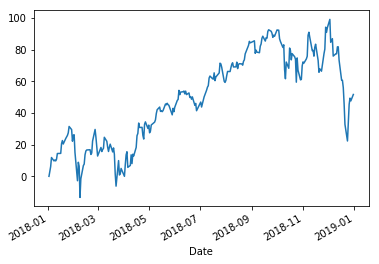

In [48]:
df_pct_sum_0[['MSFT', 'UNH', 'V', 'AXP']].sum(axis=1).plot()

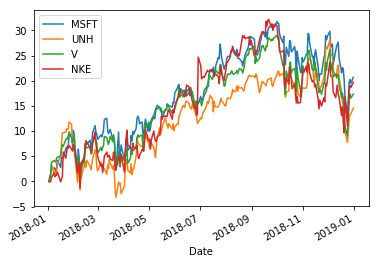

In [30]:
#графики для пятой из максимальных клик
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE']].plot()

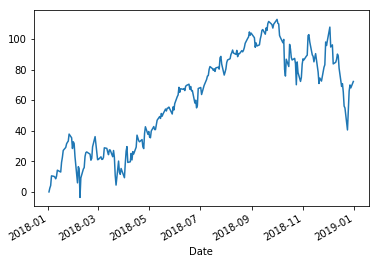

In [49]:
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE']].sum(axis=1).plot()

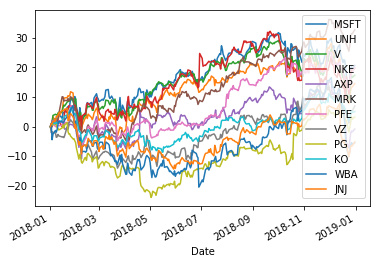

In [50]:
#Посмотрим что получается для уникальных компонент пяти максимальных клик на графиках
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE', 'AXP','MRK', 'PFE', 'VZ', 'PG', 'KO', 'WBA', 'JNJ']].plot()

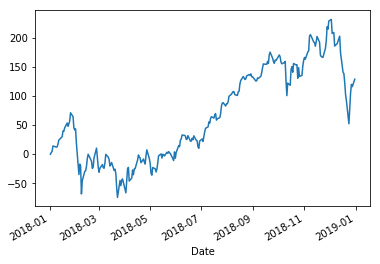

In [44]:
df_pct_sum_0[['MSFT', 'UNH', 'V', 'NKE', 'AXP','MRK', 'PFE', 'VZ', 'PG', 'KO', 'WBA', 'JNJ']].sum(axis=1).plot()